In [3]:
import yfinance as yf

msft = yf.Ticker("MSFT")



In [5]:
msft

yfinance.Ticker object <MSFT>

In [9]:
# # get all stock info (slow)
# msft.info

# # fast access to subset of stock info (opportunistic)
# msft.fast_info

# get historical market data
hist = msft.history(period="1mo")
hist.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-27 00:00:00-05:00,252.460007,252.820007,249.389999,250.160004,21190000,0.0,0.0
2023-02-28 00:00:00-05:00,249.070007,251.490005,248.729996,249.419998,22491000,0.0,0.0
2023-03-01 00:00:00-05:00,250.759995,250.929993,245.789993,246.270004,27565300,0.0,0.0
2023-03-02 00:00:00-05:00,246.550003,251.399994,245.610001,251.110001,24808200,0.0,0.0
2023-03-03 00:00:00-05:00,252.190002,255.619995,251.389999,255.289993,30741300,0.0,0.0


In [10]:
# show meta information about the history (requires history() to be called first)
msft.history_metadata

{'currency': 'USD',
 'symbol': 'MSFT',
 'exchangeName': 'NMS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': Timestamp('1986-03-13 09:30:00-0500', tz='America/New_York'),
 'regularMarketTime': Timestamp('2023-03-27 13:14:41-0400', tz='America/New_York'),
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 275.84,
 'chartPreviousClose': 250.16,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'start': Timestamp('2023-03-27 04:00:00-0400', tz='America/New_York'),
   'end': Timestamp('2023-03-27 09:30:00-0400', tz='America/New_York')},
  'regular': {'start': Timestamp('2023-03-27 09:30:00-0400', tz='America/New_York'),
   'end': Timestamp('2023-03-27 16:00:00-0400', tz='America/New_York')},
  'post': {'start': Timestamp('2023-03-27 16:00:00-0400', tz='America/New_York'),
   'end': Timestamp('2023-03-27 20:00:00-0400', tz='America/New_York')}},
 'dataGranularity': '1d',
 'range': '1mo',
 'validRanges': ['1d',
  '5d',
  '1mo',
  

---
### MACD (Moving Average Convergence Divergence)
El MACD es un indicador de análisis técnico que se utiliza para identificar cambios en la tendencia de un precio de activo financiero. Se calcula restando la media móvil exponencial (EMA, por sus siglas en inglés) de 26 períodos de la EMA de 12 períodos. Luego, se traza una EMA de 9 períodos del resultado, que se utiliza como la línea de señal.

Cuando la línea MACD cruza por encima de la línea de señal, se considera una señal alcista, lo que sugiere que el precio del activo puede subir en el futuro cercano. Por otro lado, cuando la línea MACD cruza por debajo de la línea de señal, se considera una señal bajista, lo que sugiere que el precio del activo puede caer en el futuro cercano.

---

El histograma del MACD es una representación gráfica de la diferencia entre la línea MACD y la señal MACD. El histograma es un indicador de momentum que muestra la relación entre estas dos líneas.

Cuando el histograma está por encima de la línea cero, es una señal alcista, lo que significa que el momentum alcista está aumentando. Por otro lado, cuando el histograma está por debajo de la línea cero, es una señal bajista, lo que significa que el momentum bajista está aumentando.

Además, la forma en que el histograma del MACD se mueve con respecto a la línea cero también puede ser una señal importante. Cuando el histograma se acerca a cero desde arriba, puede ser una señal de que la tendencia alcista se está debilitando. Por el contrario, cuando el histograma se acerca a cero desde abajo, puede ser una señal de que la tendencia bajista se está debilitando.

En resumen, el histograma del MACD es una herramienta útil para evaluar el momentum de una acción y puede proporcionar señales de compra y venta cuando se utiliza junto con la línea MACD y la señal MACD.

---

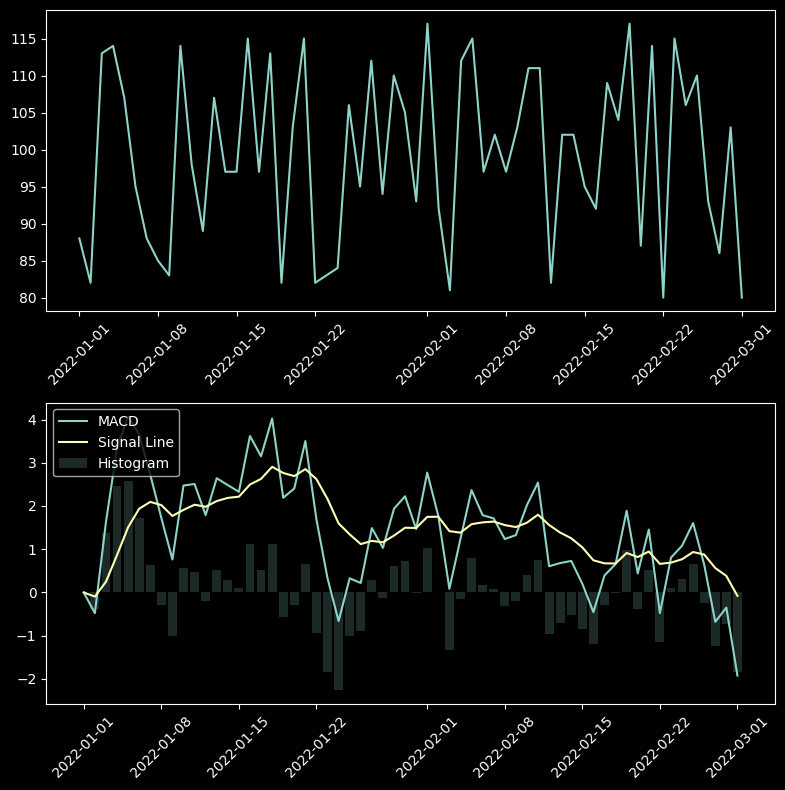

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generamos un dataframe con datos aleatorios
data = {'date': pd.date_range('2022-01-01', '2022-03-01')}
df = pd.DataFrame(data)
df['price'] = np.random.randint(80, 120, size=len(df))

# Calculamos las medias móviles exponenciales (EMA)
ema12 = df['price'].ewm(span=12, adjust=False).mean()
ema26 = df['price'].ewm(span=26, adjust=False).mean()

# Calculamos la línea MACD
macd_line = ema12 - ema26

# Calculamos la señal MACD
signal_line = macd_line.ewm(span=9, adjust=False).mean()

# Calculamos el histograma
histogram = macd_line - signal_line

# Ploteamos los resultados
fig, ax = plt.subplots(2,1, figsize=(8,8))
ax[0].plot(df['date'], df['price'], label='Price')
ax[1].plot(df['date'], macd_line, label='MACD')
ax[1].plot(df['date'], signal_line, label='Signal Line')
ax[1].bar(df['date'], histogram, label='Histogram', alpha=0.2)
ax[0].tick_params(axis="x", labelrotation=45)
ax[1].tick_params(axis="x", labelrotation=45)
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()